In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [5]:
data(nminer)

In [6]:
str(nminer)

'data.frame':	31 obs. of  8 variables:
 $ Miners : int  0 0 1 1 1 1 1 1 0 1 ...
 $ Eucs   : int  2 10 16 20 19 18 12 16 3 12 ...
 $ Area   : int  22 11 51 22 4 61 16 14 5 6 ...
 $ Grazed : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Shrubs : int  1 1 1 1 1 1 1 1 1 0 ...
 $ Bulokes: int  120 67 85 45 160 75 100 321 275 227 ...
 $ Timber : int  16 25 13 12 14 6 12 15 8 10 ...
 $ Minerab: int  0 0 3 2 8 1 8 5 0 4 ...


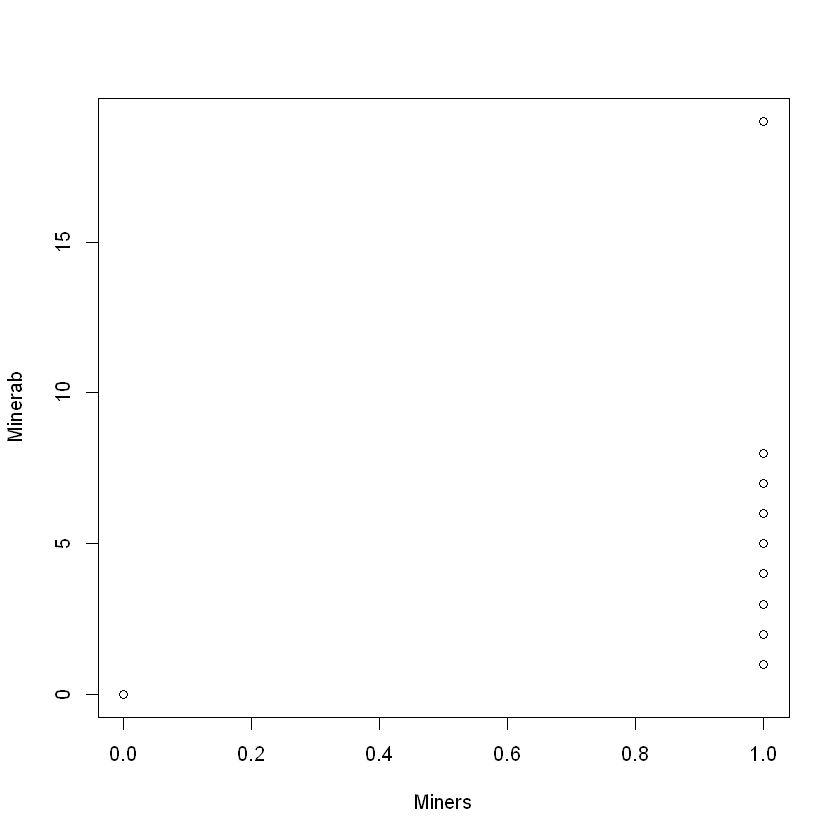

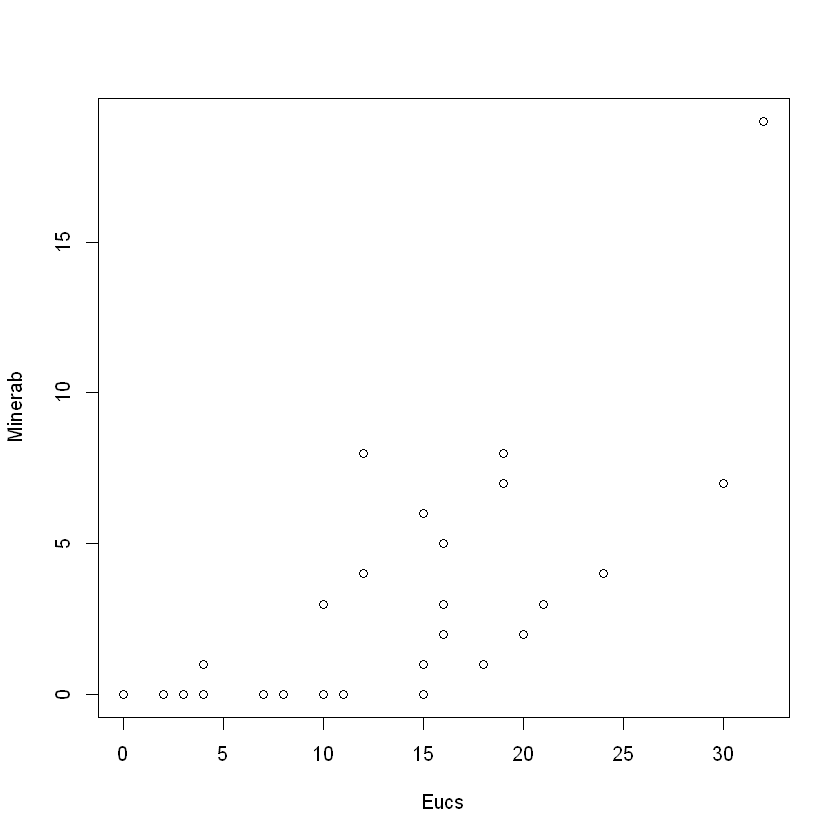

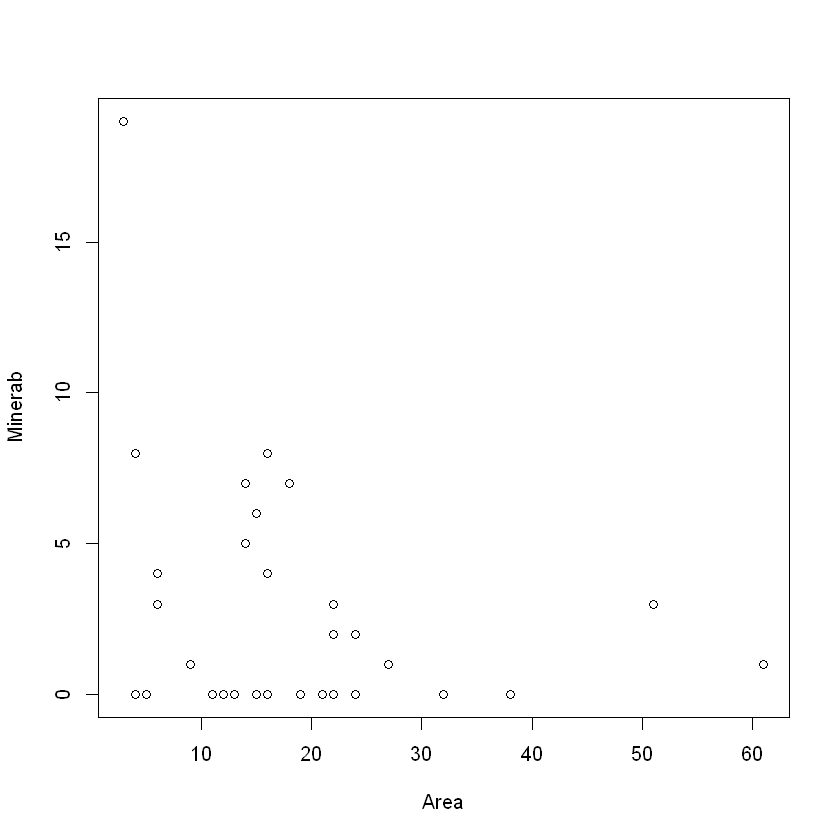

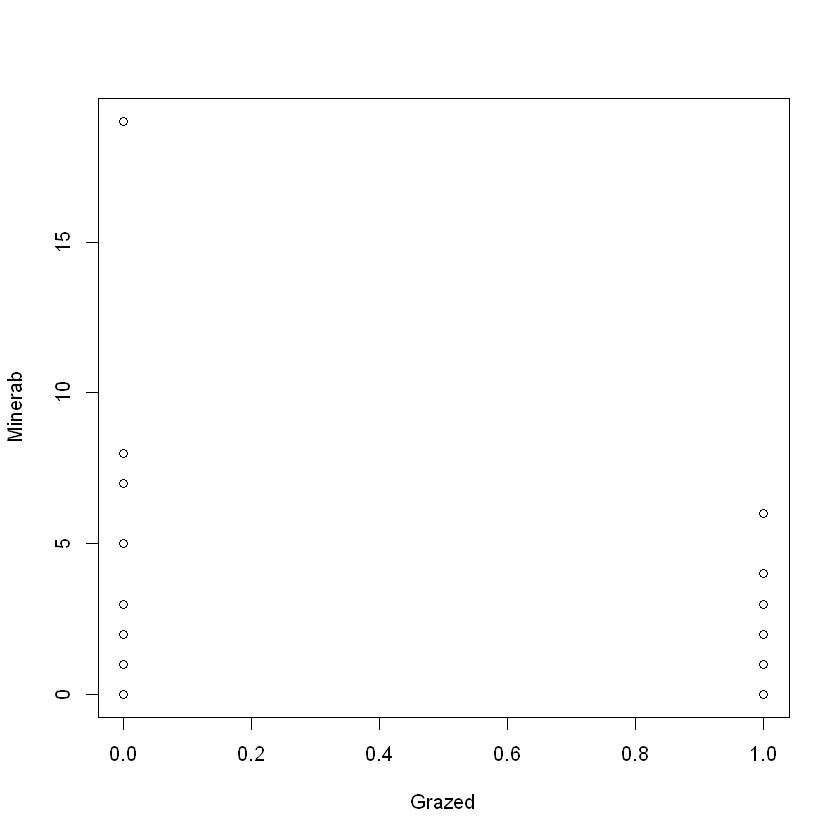

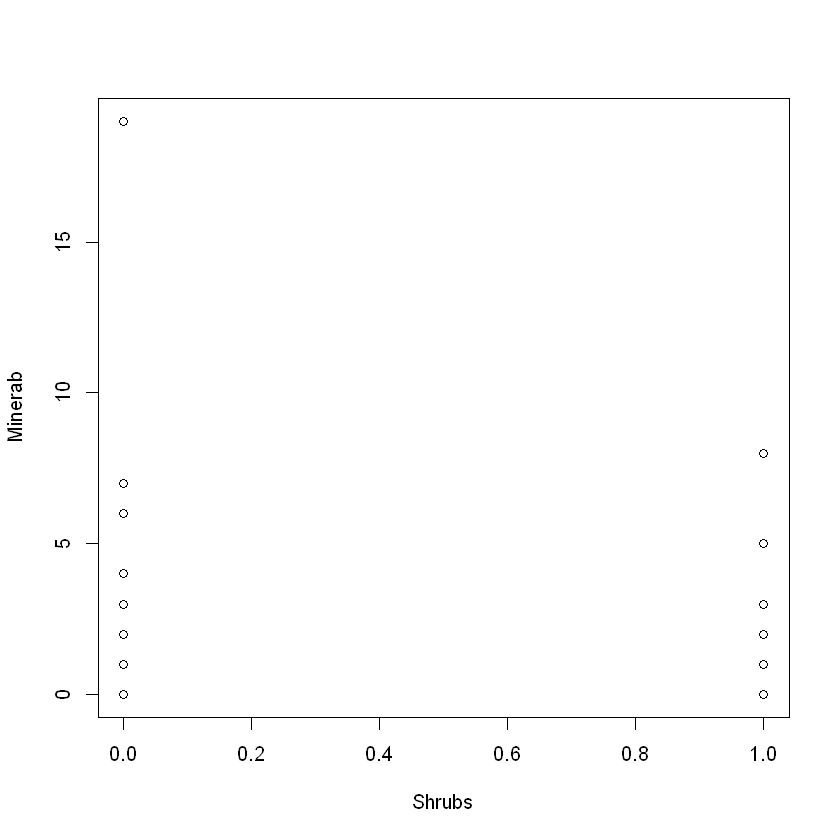

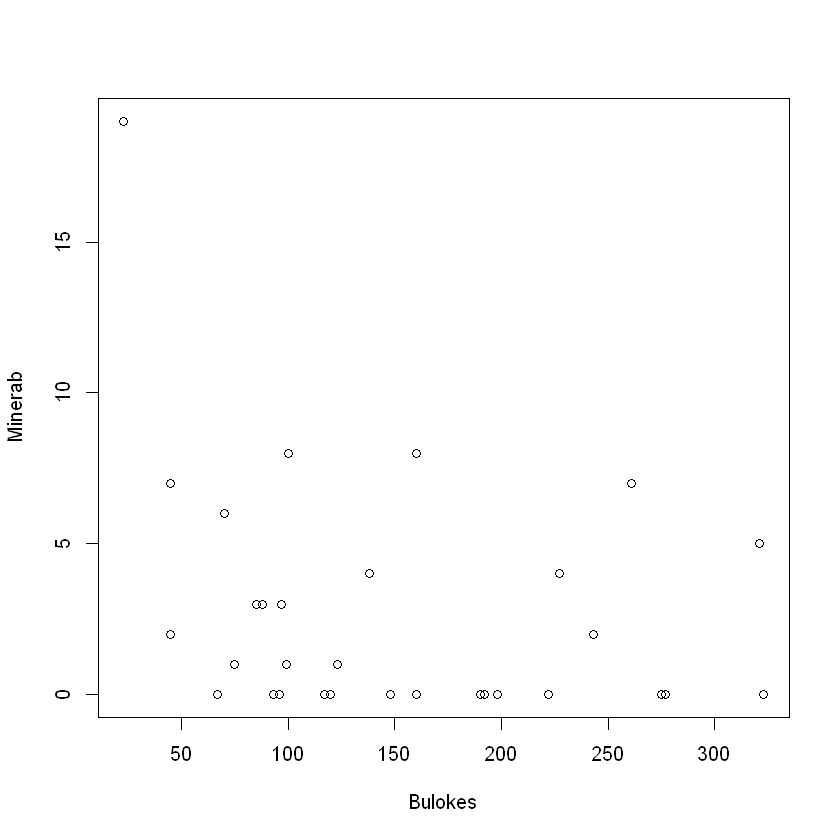

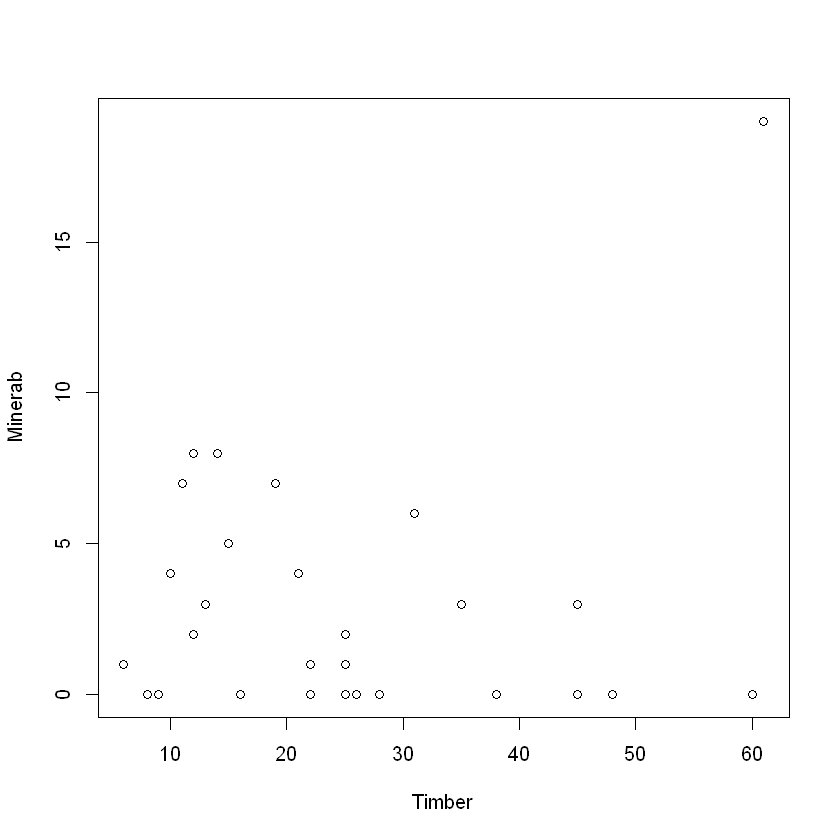

In [11]:
plot(Minerab ~ Miners, data=nminer)
plot(Minerab ~ Eucs, data=nminer)
plot(Minerab ~ Area, data=nminer)
plot(Minerab ~ Grazed, data=nminer)
plot(Minerab ~ Shrubs, data=nminer)
plot(Minerab ~ Bulokes, data=nminer)
plot(Minerab ~ Timber, data=nminer)

In [31]:
glm.1 <- glm(factor(Miners) ~ poly(Eucs, 2) + I(1/Area) + factor(Grazed) + factor(Shrubs) + Bulokes + I(1/Timber), data=nminer, family = binomial(link="logit"))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [19]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-20.992375192,17.48044085,-1.20090651,0.2297875
"poly(Eucs, 2)1",123.133945342,89.44996764,1.37656780,0.1686459
"poly(Eucs, 2)2",43.426628284,40.35210123,1.07619249,0.2818412
I(1/Area),-12.844886327,14.02255112,-0.91601637,0.3596583
factor(Grazed)1,25.694218462,19.22130377,1.33675732,0.1813019
factor(Shrubs)1,-0.183871866,2.02449365,-0.09082363,0.9276327
Bulokes,-0.007394041,0.01634613,-0.45234202,0.6510226
I(1/Timber),338.541195058,260.17336389,1.30121389,0.1931853


In [20]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,30,42.68435,NA
"poly(Eucs, 2)",2,23.82835901,28,18.85599,0.0000066948
I(1/Area),1,0.06666251,27,18.78933,0.7962596342
factor(Grazed),1,3.04942551,26,15.73990,0.0807657074
factor(Shrubs),1,0.13302710,25,15.60687,0.7153138561
Bulokes,1,0.03557843,24,15.57130,0.8503887425
I(1/Timber),1,5.22659913,23,10.34470,0.0222439844


In [21]:
deviance(glm.1) / df.residual(glm.1)

[1] 0.4497694


	Shapiro-Wilk normality test

data:  qresid(glm.1)
W = 0.95899, p-value = 0.2743


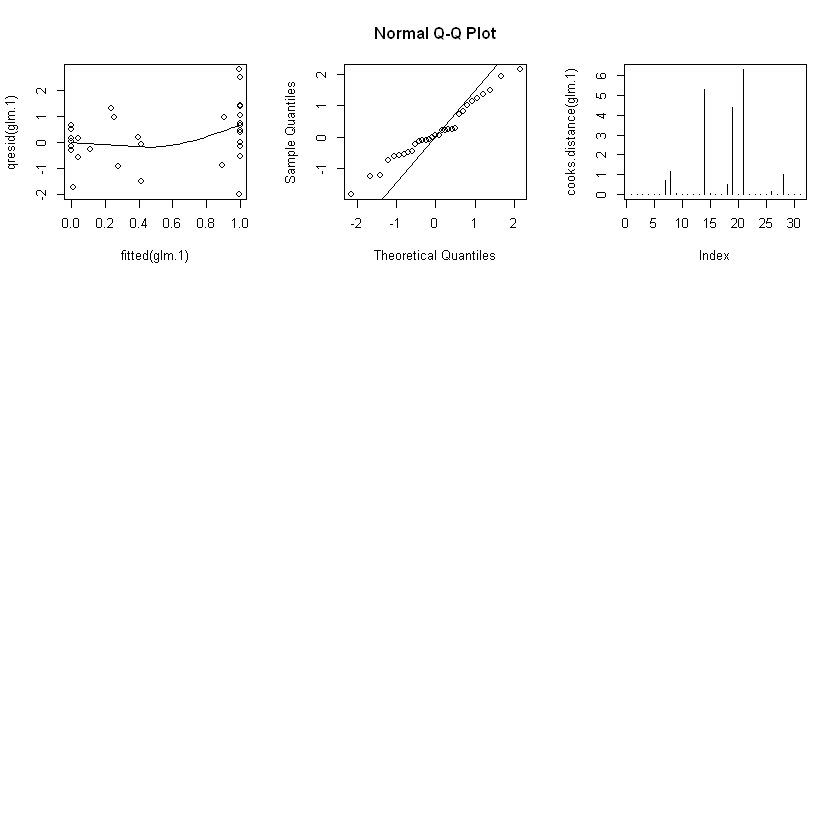

In [22]:
par(mfrow=c(3, 3))

scatter.smooth(qresid(glm.1) ~ fitted(glm.1))
#termplot(glm.1, partial.resid = TRUE, las=1)
#scatter.smooth(glm.1$linear.predictor + resid(glm.1, type="working") ~ glm.1$linear.predictor)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))
plot(cooks.distance(glm.1), type="h")
shapiro.test(qresid(glm.1))

In [23]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.p(E,2)1 dfb.p(E,2)2   dfb.I(1/A    dfb.f(G)    dfb.f(S) 
          6           5           7           4           7           4 
   dfb.Blks   dfb.I(1/T       dffit       cov.r      cook.d         hat 
          6           6           8           6           5           4

In [24]:
rowSums(influence.measures(glm.1)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 0  0  0  0  0  0  6 11  1  0  0  1  0 11  1  0  0  4 11  0  7  0  0  0  0  8 
27 28 29 30 31 
 0  6  1  0  0

In [25]:
influence.measures(glm.1)$is.inf

dfb.1_,"dfb.p(E,2)1","dfb.p(E,2)2",dfb.I(1/A,dfb.f(G),dfb.f(S),dfb.Blks,dfb.I(1/T,dffit,cov.r,cook.d,hat
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [28]:
out <- which(influence.measures(glm.1)$is.inf[, "cook.d"])

In [29]:
out

8 14 19 21 28 
 8 14 19 21 28

In [35]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-20.992375192,17.48044085,-1.20090651,0.2297875
"poly(Eucs, 2)1",123.133945342,89.44996764,1.37656780,0.1686459
"poly(Eucs, 2)2",43.426628284,40.35210123,1.07619249,0.2818412
I(1/Area),-12.844886327,14.02255112,-0.91601637,0.3596583
factor(Grazed)1,25.694218462,19.22130377,1.33675732,0.1813019
factor(Shrubs)1,-0.183871866,2.02449365,-0.09082363,0.9276327
Bulokes,-0.007394041,0.01634613,-0.45234202,0.6510226
I(1/Timber),338.541195058,260.17336389,1.30121389,0.1931853


In [36]:
dose.p(glm.1, c(2, 1), 0.9)

             Dose       SE
p = 0.9: 5.760983 2.720211

In [37]:
dose.p(glm.1, c(3, 1), 0.9)

             Dose       SE
p = 0.9: 1.964018 1.690987